# Spurious Correlation

**Coauthored by Samuel (Siyang)  Li, Thomas Sargent, and Natasha Watkins**

This notebook illustrates the phenomenon of **spurious correlation** between two uncorrelated but individually highly serially correlated time series 

The phenomenon surfaces when two conditions occur

* the sample size is  small 

* both series are highly serially correlated

We'll proceed by 

- constructing many simulations of two uncorrelated but individually serially correlated time series 

- for each simulation, constructing the correlation coefficient between the two series

- forming a histogram of the correlation coefficient

- taking that histogram as a good approximation of the population distribution of the correlation coefficient

In more detail, we construct two time series governed by

$$ \eqalign{ y_{t+1} & = \rho y_t + \sigma \epsilon_{t+1} \cr
             x_{t+1} & = \rho x_t + \sigma \eta_{t+1}, \quad t=0, \ldots , T } $$
             
where

* $y_0 = 0, x_0 = 0$

* $\{\epsilon_{t+1}\}$ is an i.i.d. process where $\epsilon_{t+1}$ follows a normal distribution with mean zero and variance $1$

* $\{\eta_{t+1}\}$ is an i.i.d. process where $\eta_{t+1}$ follows a normal distribution with mean zero and variance $1$

We construct the sample correlation coefficient between the time series $y_t$ and $x_t$ of length $T$

The population value of correlation coefficient is zero

We want to study the distribution of the sample correlation coefficient as a function of $\rho$ and $T$ when
$\sigma > 0$





We'll begin by importing some useful modules

In [1]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns

# Empirical distribution of correlation coefficient r

We now set up a function to generate a panel of simulations of two identical independent AR(1) time series

We set the function up so that all arguments are keyword arguments with associated default values

- location is the common mathematical expectation of the innovations in the two independent autoregressions

- sigma is the common standard deviation of the indepedent innovations in the two autoregressions 

- rho is the common autoregression coefficient of the two  AR(1) processes

- sample_size_series is the length of each of the two time series

- simulation is the number of simulations used to generate an empirical distribution of the correlation of the two uncorrelated time series

In [2]:
def spurious_reg(rho=0, sigma=10, location=0, sample_size_series=300, simulation=5000):
    """
    Generate two independent AR(1) time series with parameters: rho, sigma, location, 
    sample_size_series(r.v. in one series), simulation. 
    Output : displays distribution of empirical correlation
    """
        
    def generate_time_series():
        # Generates a time series given parameters
        
        x = []  # Array for time series
        x.append(np.random.normal(location/(1 - rho), sigma/np.sqrt(1 - rho**2), 1))  # Initial condition
        x_temp = x[0]
        epsilon = np.random.normal(location, sigma, sample_size_series)  # Random draw
        T = range(sample_size_series - 1)
        for t in T:
            x_temp = x_temp * rho + epsilon[t]  # Find next step in time series
            x.append(x_temp)
        return x
    
    r_list = []  # Create list to store correlation coefficients
    
    for round in range(simulation):    
        y = generate_time_series()
        x = generate_time_series()
        r = stats.pearsonr(y, x)[0]  # Find correlation coefficient
        r_list.append(r)    
     
    fig, ax = plt.subplots()
    sns.distplot(r_list, kde=True, rug=False, hist=True, ax=ax)  # Plot distribution of r
    ax.set_xlim(-1, 1)
    plt.show()

### Comparisons of two value of $\rho$

The next two cells we'll compare outcomes with a low $\rho$ versus a high $\rho$


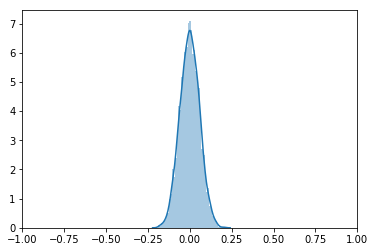

In [3]:
spurious_reg(0, 10, 0, 300, 5000)  # rho = 0

For rho = 0.99

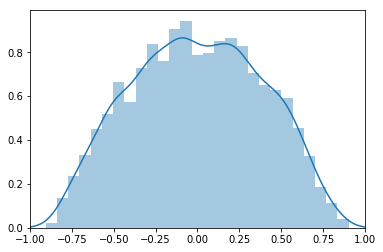

In [4]:
spurious_reg(0.99, 10, 0, 300, 5000)  # rho = .99

What if we change the series to length 2000 when $\rho $ is high?

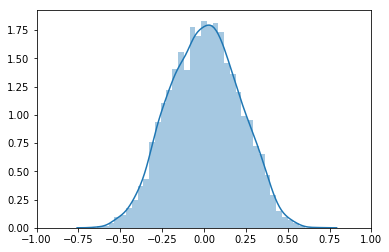

In [5]:
spurious_reg(0.99, 10, 0, 2000, 5000)

###  Try other values that you want

Now let's use the sliders provided by widgets to experiment

(Please feel free to edit the following cell in order to change the range of admissible values of $T$ and $\rho$)


In [6]:
from ipywidgets import interactive, fixed, IntSlider

interactive(spurious_reg, 
            rho=(0, 0.999, 0.01),
            sigma=fixed(10), 
            location=fixed(0), 
            sample_size_series=IntSlider(min=20, max=300, step=1, description='T'), 
            simulation=fixed(1000))

interactive(children=(FloatSlider(value=0.0, description='rho', max=0.999, step=0.01), IntSlider(value=20, des…